# Data Science Challenge: Card Transactions

### Question 1: Load
Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here.
Please describe the structure of the data. Number of records and fields in each record?
Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.
### Question 2: Plot
Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
Report any structure you find and any hypotheses you have about that structure.
### Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.
Can you programmatically identify reversed and multi-swipe transactions?
What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
Did you find anything interesting about either kind of transaction?
### Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.
Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
Provide an estimate of performance using an appropriate sample, and show your work.
Please explain your methodology. (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

### tips
explanations of your intent, methods, conclusions and any assumptions <br />
clear, documented, and well-structured code <br />
instructions for running your code <br />
methods you attempted that didn't work <br />
ideas you didn't have time to complete but would have done with more time <br />
a thorough write up with any pertinent visualizations <br />

## answer for Q1 (Data exploration)
#### data loading
1. The raw data has 29 attributes and 786363 records.
2. 'acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType' have null values.
3. 'echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd' are all null values. These attributes were dropped off. 
4. 'accountNumber','customerId' have the exactly same information. 'accountNumber' was dropped off.
5. 'transactionDateTime','accountOpenDate','dateOfLastAddressChange' were converted to data_time format.
6. 'cardPresent','expirationDateKeyInMatch','isFraud' are bool and were converted to numerical bool.
7. added 'CVVInMatch' attribute based on 'cardCVV' and 'enteredCVV'.

#### data description
1. The data has 5000 accounts. One account has 32850 transactions as the most but 783 fraud transactions as the most. Some accounts have significantly more fraudulent transactions than others.
2. The credit limit is from 250 to 50000.
3. The available money is from -1005.63 to 50000.
4. The transaction date is between 2016-1-1 to 2016-12-30.
5. The transaction amount is between 0 to 2011.54.
6. The current balance is from 0 to 47498.81.
7. AMC, EZ Putt Putt, Uber, Lyft, oldnavy.com are the most popular place for using this card. 
8. The acquisition countries merchant countries include US, MEX, CAN, and PR.
9. online_retail, fastfood, entertainment, food, online_gifts are the most popular categories.
10. transaction type includes PURCHASE, REVERSAL, ADDRESS_VERIFICATION, and others.
11. 44.87% of the transactions are card-presented transactions.
12. 0.13% of the transactions are expiration date mismatch transactions.
13. 0.89% of the transactions are CVV mismatch transactions.                
14. There is an imbalanced pattern for the fraud transaction, fraud transaction takes only 1.579%. 

## answer for Q2 (Data exploration with some plots)
1. The mean of transaction amounts is 136.98, the first quartile is 33.65, the median is 87.90, and the third quartile is 191.48. 
2. 3.4% of the transactions have an amount of less than 1 dollar, which is related to account validation.
3. 72.3% of transactions have money between 10 to 250 dollars.
4. 0.12% of transactions have money of more than 1000 dollars.
5. The top 5 categories of the mean transaction amount are personal care, subscriptions, rideshare, online_gifts, entertainment.
6. The top 5 categories of the max transaction amount are online_retail, fastfood, food, health, auto.
7. more transactions were made from 9pm to 9am (night) than from daytime.
8. more transactions were made during the weekend than on a weekday.
9. more transactions were made from July to Dec than Jan to June.

## answer for Q3 (duplicated transactions)
1. The method to calculate the amount of reversal transactions and the number of reversal transactions: <br>
a. The assumption is a reversal transaction should pair with a purchase or an address validation with the same customer Id, Last 4Digits of a card, transaction amount, and merchant name. I didn't add CVV and expiration date here as the identity since a client may get a new card after the existing is expired. <br>
b. Some transaction records have no transaction type. These could be reversal transactions paired with the existing purchase, address validation or purchase or address validation paired with reversal transactions, and reversal transactions paired with the unmarked purchase or address validation. <br>
2. The result of reversal transactions: <br>
total number of reversals:  18370 <br>
total amount of reversals:  2670554.23 <br>
3. The method to calculate the amount of reversal transactions and the number of multi-swipe transactions: <br>
a. The assumption is that multi-swipe transactions should have the same customer Id, Last 4Digits of a card, currentExpDate, cardCVV, transaction amount, and merchant name. These should be finished in a short time such as 180s (3 minutes). <br>
b. The transactions were sorted by time, grouped by customer Id, Last 4Digits of a card, currentExpDate, cardCVV, transaction amount, and merchant name, and calculated the time difference. The time difference is smaller than the 180s (3 minutes) were recognized as multi-swipe transactions. Only the first one was kept. <br> 
4. The result of multi-swipe transactions: <br>
total number of reversals:  13402 <br>
total amount of reversals:  1933949.11 <br>


## answer for Q4 (feature engineering, predictive model and model evaluation)
1. feature engineering <br>
a. night, weekend, month, amount, duration_acc, duration_add, money, fraudRatio, mcc_ratio, mnc_ratio were created. <br>
b. The distribution of a feature in fraudulent transactions and non-fraud transactions showed up. <br>
c. Using the stepwise method, the irrelative feature was dropped off. <br>
2. predictive model <br>
a. 75% training and 25% testing  <br>
b. since this is imbalanced data, there are two ways to deal with it. <br>
I tried random oversampling, random undersampling, and SMOTE of training data. <br>
I also tried to use the original data but with a class-weighted loss function (more penalty if a minority was misclassified). <br>
c. I tried three baseline models: decision tree, logistic regression, and random forest <br>
d. I tried a grid search to find the best parameter combination of random forest <br>
3. model evaluation <br>
a. Metrics: roc score, roc curve, precision, false alarm rate, and accuracy score <br>
precision and false alarm rate are important since a false alarm can lead to a bad customer experience but a missing can be detected by other models. <br>
4. Results <br>
a. The random undersampling dataset provides the best models in all three models. <br>
b. A class-weighted loss function for models with the original data didn’t perform as well as the model with the balanced input. <br> 
c. Random forest (n_estimators = 300, max_depth=9, max_leaf_nodes=18) has the best performance in all three models with  <br>
    auc:0.778 <br>
    AccuracyScore:0.734 <br>
    Precision:0.996 <br>
    False Alarm Rate:0.176 <br>
d. all three models can output the probability of a transaction being a fraud, which can be used by other models with an expert-defined threshold to define if it is a fraud or not.  <br>

### **metadata**
**customerId**: customer ID, same as account number, nominal  <br />
**creditLimit**: credit limit, numerical  <br />
**availableMoney**: available money, numerical  <br />
**transactionDateTime**: transaction data and time, date <br />
**transactionAmount**: transaction amount, have 0 and duplicated records, numerical <br />
**merchantName**: nominal  <br />
**acqCountry**: acquisition country, has null value, nominal <br />
**merchantCountryCode**: merchant country, has null value, nominal <br />
**posEntryMode**: pos entry code, has null value, nominal, 
    05   Integrated circuit card read,
    09   PAN entry via electronic commerce including chip,
    02   Magnetic stripe read,
    90   Magnetic stripe read and extract content of Track 1 or Track 2 included,
    80   Chip card was unable to process/magnetic stripe read default  <br />
**posConditionCode**: pos condition code, has null value, nominal, 
    01    Normal transaction,
    08    Mail/telephone order,
    99    Other Place of Service  <br />
**merchantCategoryCode**: merchant category, nominal <br />
**currentExpDate**: Exp Date, nominal <br />
**accountOpenDate**: Open Date, date <br />
**dateOfLastAddressChange**: Last Address Change Date, date <br />
**cardCVV**: card CVV, nomial <br />
**enteredCVV**: entered CVV, nominal <br />
**cardLast4Digits**: nominal <br />
**transactionType**: transaction type, has null value, nominal <br />
**currentBalance**: currect balance, numerical <br />
**cardPresent**: card present transaction, bool  <br /> 
**expirationDateKeyInMatch**: bool  <br />
**isFraud**: bool  <br />
**merchantNameClean**: cleaned merchantName with specific store number such #1234, nominal <br />
**CVVInMatch**:  bool  <br />
**night**: if  the transaction happened at night,  bool  <br />
**weekend**: if  the transaction happened at weekend,  bool  <br />
**month**: the month that the transaction happened,  bool  <br />
**amount**: categorized transaction amount, nominal  <br />
**duration_acc**: time difference between transaction and account opening, nominal  <br />
**duration_add**: time difference between transaction and last address change, nominal  <br />
**money**: available money is more than 0,  bool  <br />
**fraudRatio**: the ratio of fraud transactions in one account, numerical  <br />
**mcc_ratio**: the ratio of fraud transactions in merchantCategoryCode, numerical  <br />
**mnc_ratio**: the ratio of fraud transactions in merchantNameClean, numerical  <br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## answer for Q1 (Data exploration)

In [2]:
df = pd.read_json(r'data\raw\transactions.txt',lines=True)

In [3]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [4]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [6]:
#browse the raw_data
for count,col in enumerate(df.columns):
        print(df.loc[:,col].value_counts())

380680241    32850
882815134    13189
570884863    10867
246251253    10172
369308035     7229
             ...  
675656700        1
456500351        1
587921563        1
749645399        1
266636812        1
Name: accountNumber, Length: 5000, dtype: int64
380680241    32850
882815134    13189
570884863    10867
246251253    10172
369308035     7229
             ...  
675656700        1
456500351        1
587921563        1
749645399        1
266636812        1
Name: customerId, Length: 5000, dtype: int64
5000     201863
15000    139307
7500      97913
2500      75429
20000     68629
10000     56889
50000     48781
1000      36430
250       34025
500       27097
Name: creditLimit, dtype: int64
250.00      6015
5000.00     5400
15000.00    4254
7500.00     4069
500.00      2811
            ... 
3665.23        1
4089.80        1
4650.83        1
4652.82        1
48666.83       1
Name: availableMoney, Length: 521915, dtype: int64
2016-12-25T14:04:15    4
2016-05-28T14:24:41    4
2016-06-0

In [7]:
#drop off the empty cols
df_clean=df.copy()
df_clean.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1,inplace=True)

In [8]:
#check the corr of 'accountNumber' and 'customerId'
df_clean[['accountNumber','customerId']].corr()

,accountNumber,customerId
accountNumber,1.0,1.0
customerId,1.0,1.0


In [9]:
df_clean.drop('accountNumber',axis=1,inplace=True)

In [10]:
#convert object to date_time
df_clean['transactionDateTime']=df_clean['transactionDateTime'].astype('datetime64[s]')
df_clean['accountOpenDate']=df_clean['accountOpenDate'].astype('datetime64[s]')
df_clean['dateOfLastAddressChange']=df_clean['dateOfLastAddressChange'].astype('datetime64[s]')

In [11]:
#clean the merchant name
df_clean['merchantNameClean']=''
for i in range(len(df_clean)):
    if '#' in df_clean.merchantName.iloc[i]:
        df_clean.merchantNameClean.iloc[i]=df_clean.merchantName.iloc[i].split('#')[0]
    else:
        df_clean.merchantNameClean.iloc[i]=df_clean.merchantName.iloc[i]

In [12]:
#calculate the CVV match
df_clean['CVVInMatch']=np.where((df_clean['cardCVV']==df_clean['enteredCVV']),1,0)

In [13]:
num_list=['creditLimit','availableMoney','transactionAmount','currentBalance']
date_list=['transactionDateTime','accountOpenDate','dateOfLastAddressChange']
str_list=['acqCountry','merchantCountryCode','merchantCategoryCode','transactionType',
          'posEntryMode','posConditionCode','merchantNameClean']
bool_list=['cardPresent','expirationDateKeyInMatch','isFraud']

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customerId                786363 non-null  int64         
 1   creditLimit               786363 non-null  int64         
 2   availableMoney            786363 non-null  float64       
 3   transactionDateTime       786363 non-null  datetime64[ns]
 4   transactionAmount         786363 non-null  float64       
 5   merchantName              786363 non-null  object        
 6   acqCountry                786363 non-null  object        
 7   merchantCountryCode       786363 non-null  object        
 8   posEntryMode              786363 non-null  object        
 9   posConditionCode          786363 non-null  object        
 10  merchantCategoryCode      786363 non-null  object        
 11  currentExpDate            786363 non-null  object        
 12  ac

In [15]:
df_clean.describe()

,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,CVVInMatch
count,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089,0.991079
std,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068,0.094028
min,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000,1.000000
50%,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000,1.000000
75%,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000,1.000000
max,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000,1.000000


In [16]:
for col in str_list:
        print(df_clean[col].value_counts())

US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64
US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: merchantCountryCode, dtype: int64
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: merchantCategoryCode, dtype: int64
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: transactionType, dtype: int64

In [17]:
#compute the start and end time
for col in date_list:
        print('{}_max:'.format(col),df_clean[col].max(),'  {}_min:'.format(col),df_clean[col].min())

transactionDateTime_max: 2016-12-30 23:59:45   transactionDateTime_min: 2016-01-01 00:01:02
accountOpenDate_max: 2015-12-31 00:00:00   accountOpenDate_min: 1989-08-22 00:00:00
dateOfLastAddressChange_max: 2016-12-30 00:00:00   dateOfLastAddressChange_min: 1989-08-22 00:00:00


In [18]:
#compute the fraud and non-fraud
df_clean['isFraud'].value_counts(normalize=True)

False    0.98421
True     0.01579
Name: isFraud, dtype: float64

In [19]:
#compute the present and non-present
df_clean['cardPresent'].value_counts(normalize=True)

False    0.551266
True     0.448734
Name: cardPresent, dtype: float64

In [20]:
#compute the expiration date match or not match
df_clean['expirationDateKeyInMatch'].value_counts(normalize=True)

False    0.998674
True     0.001326
Name: expirationDateKeyInMatch, dtype: float64

In [21]:
#compute the cvv match and not match
df_clean['CVVInMatch'].value_counts(normalize=True)

1    0.991079
0    0.008921
Name: CVVInMatch, dtype: float64

In [22]:
#replace the null with other
for col in ['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType']:
    df_clean[col].replace('','other',inplace=True)

In [23]:
#calculate the number of transactions in each customer ID
usage=pd.DataFrame(df_clean.groupby(by='customerId').agg('transactionAmount').count()).sort_values(by='transactionAmount')
usage.columns = ['transactions_total']
usage.describe()

,transactions_total
count,5000.00000
mean,157.27260
std,655.30506
min,1.00000
25%,21.00000
50%,50.00000
75%,123.00000
max,32850.00000


In [24]:
#calculate the number of fruad transactions in each customer ID
usage_f=pd.DataFrame(df_clean.groupby(by='customerId').agg('isFraud').sum()).sort_values(by='isFraud')
usage_f.columns = ['transactions_fraud']
usage_f.describe()

,transactions_fraud
count,5000.000000
mean,2.483400
std,15.800888
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,783.000000


In [25]:
cust=pd.merge(usage,usage_f,on='customerId')

Text(0.5, 0, 'the number of total transcations')

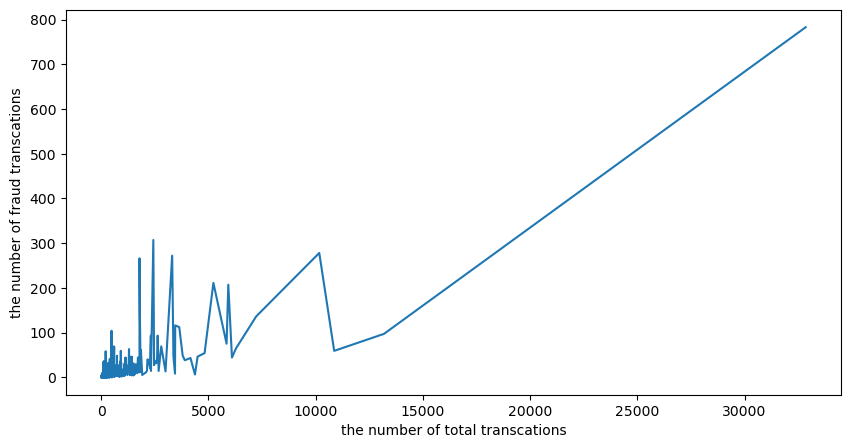

In [26]:
#Some accounts have significantly more fraud transactions than others
fig, axs = plt.subplots(figsize=(10, 5))
axs.plot(cust['transactions_total'],cust['transactions_fraud'])
axs.set_ylabel('the number of fraud transcations')
axs.set_xlabel('the number of total transcations')

## answer for Q2 (Data exploration with some plots)

In [27]:
#calculate the amount stats
df_clean.transactionAmount.describe()

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

Text(0, 0.5, 'Amount')

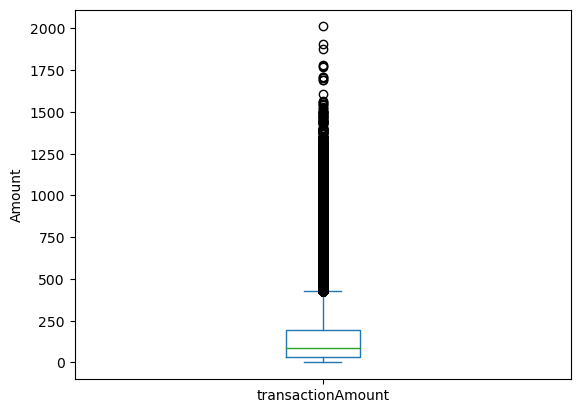

In [28]:
#boxplot of amount
df_clean['transactionAmount'].plot(kind="box")
plt.xticks(rotation=0)
plt.ylabel("Amount")

Text(0.5, 0, 'Amount')

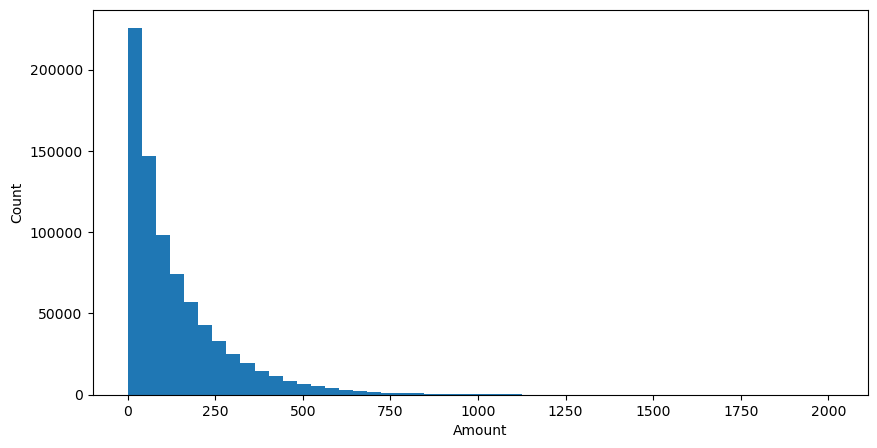

In [29]:
#distribution of amount
fig, axs = plt.subplots(figsize=(10, 5))
axs.hist(df_clean['transactionAmount'],bins=50)
axs.set_ylabel('Count')
axs.set_xlabel('Amount')

In [30]:
#categorize the transaction amount
amount_dict={'amount':[],'count':[]}
amount_dict['amount'].extend(['0','0-1','1-10','10-250','250-500','500-1000','>1000'])
amount_dict['count'].extend([len(df_clean.loc[(df_clean['transactionAmount']==0),:]),
                             len(df_clean.loc[(df_clean['transactionAmount']>0) & (df_clean['transactionAmount']<=1),:]),
                             len(df_clean.loc[(df_clean['transactionAmount']<=10) & (df_clean['transactionAmount']>1),:]),
                             len(df_clean.loc[(df_clean['transactionAmount']<=250) & (df_clean['transactionAmount']>10),:]),
                             len(df_clean.loc[(df_clean['transactionAmount']<=500) & (df_clean['transactionAmount']>250),:]),
                             len(df_clean.loc[(df_clean['transactionAmount']<=1000) & (df_clean['transactionAmount']>500),:]),
                             len(df_clean.loc[df_clean['transactionAmount']>1000,:])])

In [31]:
#the pattern of categorized amount
amount=pd.DataFrame.from_dict(amount_dict)
amount

,amount,count
0,0,22225
1,0-1,4655
2,1-10,57714
3,10-250,568477
4,250-500,107906
5,500-1000,24433
6,>1000,953


Text(0.5, 0, 'Amount')

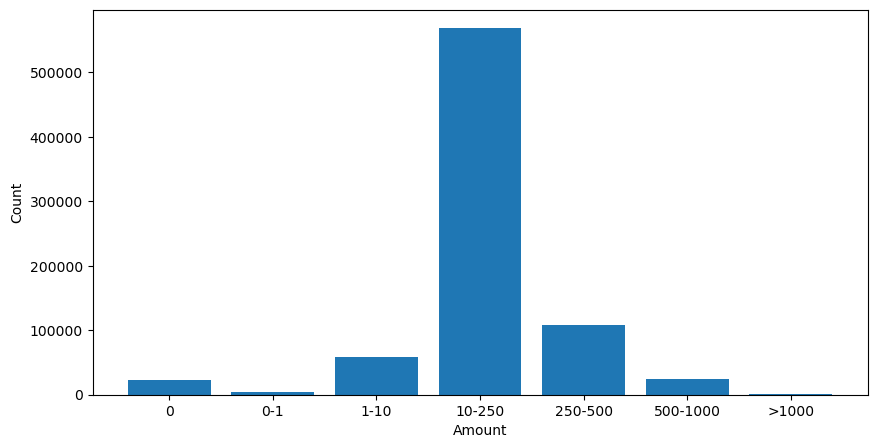

In [32]:
#the pattern of categorized amount
fig, axs = plt.subplots(figsize=(10, 5))
axs.bar(amount['amount'],amount['count'])
axs.set_ylabel('Count')
axs.set_xlabel('Amount')

In [33]:
#max and min of transaction amount in transaction type
type_mean=pd.DataFrame(df_clean.groupby('transactionType').agg('transactionAmount').mean()).sort_values(by='transactionAmount',ascending=False)
type_mean.columns = ['transactionsAmount_mean']
type_max=pd.DataFrame(df_clean.groupby('transactionType').agg('transactionAmount').max()).sort_values(by='transactionAmount',ascending=False)
type_max.columns = ['transactionsAmount_max']
print(type_mean)
print(type_max)

                      transactionsAmount_mean
transactionType                              
other                              155.386504
PURCHASE                           140.621698
REVERSAL                           138.984017
ADDRESS_VERIFICATION                 0.000000
                      transactionsAmount_max
transactionType                             
PURCHASE                             2011.54
REVERSAL                             1435.64
other                                1135.64
ADDRESS_VERIFICATION                    0.00


In [34]:
#max and min of transaction amount in merchant country
country_mean=pd.DataFrame(df_clean.groupby('merchantCountryCode').agg('transactionAmount').mean()).sort_values(by='transactionAmount',ascending=False)
country_mean.columns = ['transactionsAmount_mean']
country_max=pd.DataFrame(df_clean.groupby('merchantCountryCode').agg('transactionAmount').max()).sort_values(by='transactionAmount',ascending=False)
country_max.columns = ['transactionsAmount_max']
print(country_mean)
print(country_max)

                     transactionsAmount_mean
merchantCountryCode                         
other                             138.635249
MEX                               138.375418
CAN                               137.821171
US                                136.981686
PR                                134.168076
                     transactionsAmount_max
merchantCountryCode                        
US                                  2011.54
other                               1339.92
MEX                                 1166.80
CAN                                 1106.07
PR                                   954.59


In [35]:
#max and min of transaction amount in merchant category
cate_mean=pd.DataFrame(df_clean.groupby('merchantCategoryCode').agg('transactionAmount').mean()).sort_values(by='transactionAmount',ascending=False)
cate_mean.columns = ['transactionsAmount_mean']
cate_max=pd.DataFrame(df_clean.groupby('merchantCategoryCode').agg('transactionAmount').max()).sort_values(by='transactionAmount',ascending=False)
cate_max.columns = ['transactionsAmount_max']
print(cate_mean)
print(cate_max)

                      transactionsAmount_mean
merchantCategoryCode                         
personal care                      147.516877
subscriptions                      146.900673
rideshare                          146.220783
online_gifts                       146.126042
entertainment                      146.041694
health                             145.706099
fastfood                           145.591507
hotels                             145.585076
food                               145.313906
online_retail                      145.231632
airline                            144.956619
furniture                          144.925686
auto                               144.844389
cable/phone                         97.288068
food_delivery                       53.155968
fuel                                45.180771
gym                                 33.466315
online_subscriptions                14.578915
mobileapps                           5.837203
                      transactions

In [36]:
#manipulate the date and time
df_clean['hour']=df_clean['transactionDateTime'].dt.hour
df_clean['weekday']=df_clean['transactionDateTime'].dt.weekday
df_clean['night']=np.where((df_clean['hour']>=21)|(df_clean['hour']<=9),1,0)
df_clean['weekend']=np.where((df_clean['weekday']==5)|(df_clean['weekday']==6),1,0)
df_clean['month']=df_clean['transactionDateTime'].dt.month
df_clean.drop(['hour','weekday'],axis=1,inplace=True)
df_clean.head()

,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,merchantNameClean,CVVInMatch,night,weekend,month
0,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,01,...,PURCHASE,0.0,False,False,False,Uber,1,0,1,8
1,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,01,...,PURCHASE,0.0,True,False,False,AMC,1,1,0,10
2,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,...,PURCHASE,0.0,False,False,False,Play Store,1,1,0,11
3,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,...,PURCHASE,0.0,False,False,False,Play Store,1,1,1,12
4,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,01,...,PURCHASE,0.0,True,False,False,Tim Hortons,1,1,0,3


In [37]:
#transaction # in day and night
night=pd.DataFrame(df_clean.groupby('night').agg('transactionAmount').count())
night.columns = ['number of transactions']
print(night)

       number of transactions
night                        
0                      361328
1                      425035


In [38]:
#transaction # in weekend and weekday
weekend=pd.DataFrame(df_clean.groupby('weekend').agg('transactionAmount').count())
weekend.columns = ['number of transactions']
print(weekend)

         number of transactions
weekend                        
0                        562767
1                        223596


In [39]:
month=pd.DataFrame(df_clean.groupby('month').agg('transactionAmount').count())
month.columns = ['number of transactions']
print(month)

       number of transactions
month                        
1                       61572
2                       59042
3                       63927
4                       62633
5                       65689
6                       64735
7                       67159
8                       68129
9                       66777
10                      69627
11                      68097
12                      68976


## answer for Q3 (duplicated transcations)

In [40]:
#pattern of transaction type
df_clean['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
other                      698
Name: transactionType, dtype: int64

In [41]:
#add an index col to track the records
df_copy=df_clean.copy()
df_copy['index_col'] = df_copy.index

### reversal transactions

In [42]:
#start to calculate the reversal transactions
rever=df_copy.loc[df_copy['transactionType']=='REVERSAL',['index_col','customerId','cardLast4Digits','transactionAmount','merchantName','transactionType','transactionDateTime']]
other=df_copy.loc[df_copy['transactionType']=='other',['index_col','customerId','cardLast4Digits','transactionAmount','merchantName','transactionType','transactionDateTime']]
pur_add=df_copy.loc[(df_copy['transactionType']=='PURCHASE')|(df_copy['transactionType']=='ADDRESS_VERIFICATION'),['index_col','customerId','cardLast4Digits','transactionAmount','merchantName','transactionType','transactionDateTime']]

In [43]:
#find unpaired the reversal transactions
test1=pd.merge(rever,pur_add,on=['customerId','cardLast4Digits','transactionAmount','merchantName'],
               suffixes=('', '_pur_add'),how='left')
unpaired1=test1.loc[test1['transactionType_pur_add'].isnull(),:]

In [44]:
#find missing purchase and address transaction in other
test2=pd.merge(other,pur_add,on=['customerId','cardLast4Digits','transactionAmount','merchantName'],
               suffixes=('', '_pur_add'),how='left')
unpaired2=test2.loc[test2['transactionType_pur_add'].isnull(),:]

In [45]:
#recycle the unpaired reversal transactions from other
test3=pd.merge(unpaired1[['index_col','customerId','cardLast4Digits','transactionAmount','merchantName','transactionDateTime','transactionType']],
               unpaired2[['index_col','customerId','cardLast4Digits','transactionAmount','merchantName','transactionDateTime','transactionType']],
               suffixes=('', '_recycle'),
               on=['customerId','cardLast4Digits','transactionAmount','merchantName'],
               how='left')
unpaired3=test3.loc[~test3['index_col_recycle'].isnull(),:]

In [46]:
df_copy.loc[df_copy['index_col'].isin(unpaired1['index_col']),'transactionType']='?'
temp2=test2.loc[~test2['transactionType_pur_add'].isnull(),:]
df_copy.loc[df_copy['index_col'].isin(temp2['index_col']),'transactionType']='REVERSAL'
df_copy.loc[df_copy['index_col'].isin(unpaired3['index_col']),'transactionType']='REVERSAL'

In [47]:
unpaired4=df_copy.loc[(df_copy['transactionType']=='other'),['customerId','cardLast4Digits','transactionAmount','merchantName']].duplicated()
temp4=unpaired4.loc[unpaired4==True]

In [48]:
print('total number of reversal: ',df_copy['transactionType'].value_counts()['REVERSAL']+len(temp4)/2)
print('total amount of reversal: ',sum(df_copy.loc[df_copy['transactionType']=='REVERSAL','transactionAmount'])+sum(temp4)/2)

total number of reversal:  18370.0
total amount of reversal:  2670554.2299999897


### multi-swipe transactions

In [49]:
#start to calculate the multi-swipe transactions
df_copy.sort_values('transactionDateTime',inplace=True)

In [50]:
#multi-swipe should be same in these categories
dup=df_copy.groupby(['customerId','currentExpDate','cardCVV','cardLast4Digits','transactionAmount','merchantName'])['transactionDateTime'].diff()

In [51]:
#multi-swip should be done in 180s
df_copy['duplicate']=dup.dt.total_seconds().lt(180)

In [52]:
df_copy['duplicate'].value_counts()

False    772961
True      13402
Name: duplicate, dtype: int64

In [53]:
print('total number of reversal: ',df_copy['duplicate'].value_counts()[True])
print('total amount of reversal: ',sum(df_copy.loc[df_copy['duplicate']==True,'transactionAmount']))

total number of reversal:  13402
total amount of reversal:  1933949.1100000138


## answer for Q4 (feature engineering, predictive model and model evaluation)

In [54]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customerId                786363 non-null  int64         
 1   creditLimit               786363 non-null  int64         
 2   availableMoney            786363 non-null  float64       
 3   transactionDateTime       786363 non-null  datetime64[ns]
 4   transactionAmount         786363 non-null  float64       
 5   merchantName              786363 non-null  object        
 6   acqCountry                786363 non-null  object        
 7   merchantCountryCode       786363 non-null  object        
 8   posEntryMode              786363 non-null  object        
 9   posConditionCode          786363 non-null  object        
 10  merchantCategoryCode      786363 non-null  object        
 11  currentExpDate            786363 non-null  object        
 12  ac

### feature engineering

In [55]:
#categorize the transaction amount
df_clean['amount']=df_clean['transactionAmount'].copy()
df_clean.loc[df_clean['transactionAmount']==0,'amount']=0
df_clean.loc[(df_clean['transactionAmount']>0) & (df_clean['transactionAmount']<=1),'amount']=1
df_clean.loc[(df_clean['transactionAmount']>1) & (df_clean['transactionAmount']<=10),'amount']=10
df_clean.loc[(df_clean['transactionAmount']>10) & (df_clean['transactionAmount']<=250),'amount']=250
df_clean.loc[(df_clean['transactionAmount']>250) & (df_clean['transactionAmount']<=500),'amount']=500
df_clean.loc[(df_clean['transactionAmount']>500) & (df_clean['transactionAmount']<=1000),'amount']=1000
df_clean.loc[df_clean['transactionAmount']>1000,'amount']=2500

In [56]:
#calculate the duration between transaction time and account open time
df_clean['duration_acc']=(df_clean['transactionDateTime']-df_clean['accountOpenDate'])/np.timedelta64(1, 'D')

In [57]:
#calculate the duration between transaction time and last address change time
df_clean['duration_add']=(df_clean['transactionDateTime']-df_clean['dateOfLastAddressChange'])/np.timedelta64(1, 'D')

In [58]:
#check if the available money is more than 0
df_clean['money']=np.where(df_clean['availableMoney']>0,1,0)

In [59]:
#categorize the duration of opening account
df_clean.loc[(df_clean['duration_acc']>0) & (df_clean['duration_acc']<=1),'duration_acc']=1
df_clean.loc[(df_clean['duration_acc']>1) & (df_clean['duration_acc']<=7),'duration_acc']=7
df_clean.loc[(df_clean['duration_acc']>7) & (df_clean['duration_acc']<=30),'duration_acc']=30
df_clean.loc[(df_clean['duration_acc']>30) & (df_clean['duration_acc']<=365),'duration_acc']=365
df_clean.loc[df_clean['duration_acc']>365,'duration_acc']=1000

In [60]:
#categorize the duration of changing address
df_clean.loc[(df_clean['duration_add']>0) & (df_clean['duration_add']<=1),'duration_add']=1
df_clean.loc[(df_clean['duration_add']>1) & (df_clean['duration_add']<=7),'duration_add']=7
df_clean.loc[(df_clean['duration_add']>7) & (df_clean['duration_add']<=30),'duration_add']=30
df_clean.loc[(df_clean['duration_add']>30) & (df_clean['duration_add']<=365),'duration_add']=365
df_clean.loc[df_clean['duration_add']>365,'duration_add']=1000

In [61]:
#add a new col for fraud ratio for each customer id
df_merge=pd.merge(df_clean,cust,on='customerId')
df_merge['fraudRatio']=df_merge['transactions_fraud']/df_merge['transactions_total']
df_merge.drop(['transactions_fraud','transactions_total'],axis=1,inplace=True)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customerId                786363 non-null  int64         
 1   creditLimit               786363 non-null  int64         
 2   availableMoney            786363 non-null  float64       
 3   transactionDateTime       786363 non-null  datetime64[ns]
 4   transactionAmount         786363 non-null  float64       
 5   merchantName              786363 non-null  object        
 6   acqCountry                786363 non-null  object        
 7   merchantCountryCode       786363 non-null  object        
 8   posEntryMode              786363 non-null  object        
 9   posConditionCode          786363 non-null  object        
 10  merchantCategoryCode      786363 non-null  object        
 11  currentExpDate            786363 non-null  object        
 12  ac

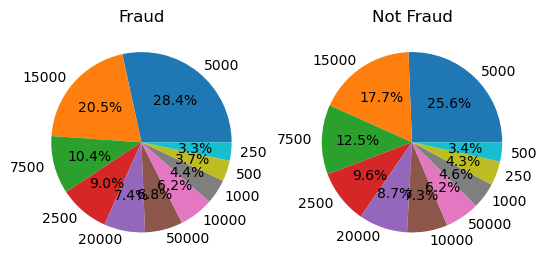

In [62]:
#divide data into fraud vs non-fraud groups
df_merge_Fr=df_merge.loc[df_merge['isFraud']==1,:]
df_merge_NFr=df_merge.loc[df_merge['isFraud']!=1,:]

#pie plot to show the feature pattern of non-default and default 
def pie(Fr,NFr,name):
    fig, axs = plt.subplots(1,2)
    axs[0].pie(Fr.loc[:,name].value_counts(),labels=Fr.loc[:,name].value_counts().index.tolist(), autopct='%1.1f%%')
    axs[0].set_title('Fraud')
    axs[1].pie(NFr.loc[:,name].value_counts(),labels=NFr.loc[:,name].value_counts().index.tolist(), autopct='%1.1f%%')
    axs[1].set_title('Not Fraud')
pie(df_merge_Fr,df_merge_NFr,'creditLimit')

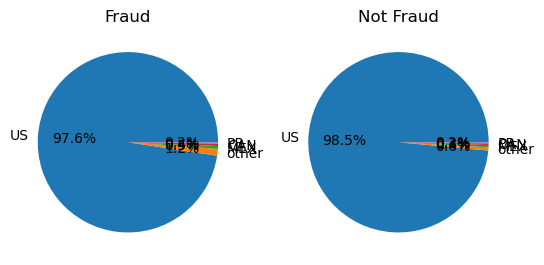

In [63]:
pie(df_merge_Fr,df_merge_NFr,'acqCountry')

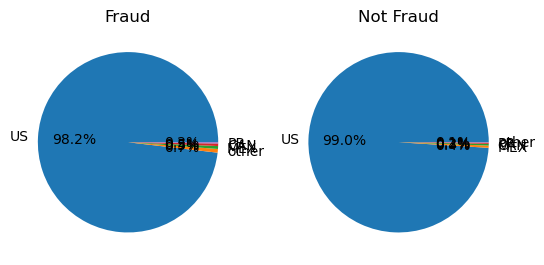

In [64]:
pie(df_merge_Fr,df_merge_NFr,'merchantCountryCode')

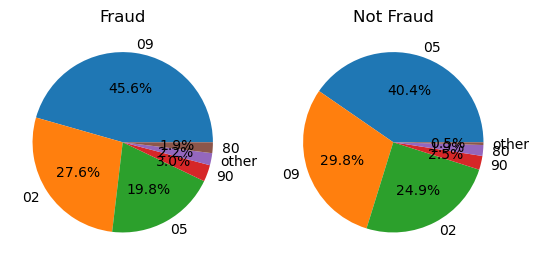

In [65]:
pie(df_merge_Fr,df_merge_NFr,'posEntryMode')

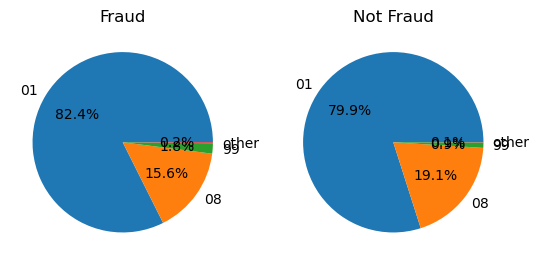

In [66]:
pie(df_merge_Fr,df_merge_NFr,'posConditionCode')

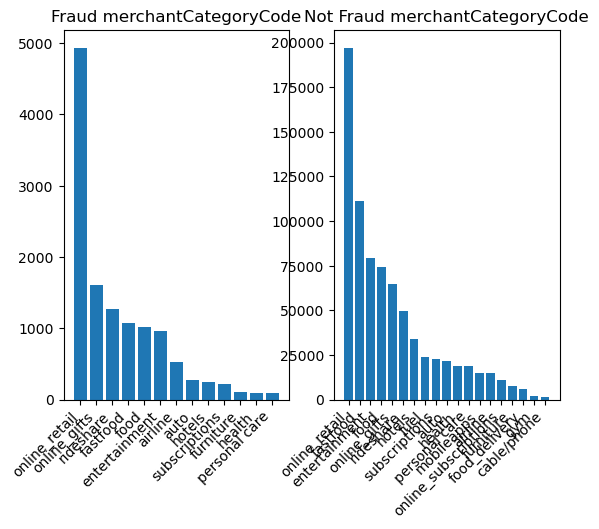

In [67]:
#bar plot to present the feature pattern of non-default and default
def bar(Fr,NFr,name):
    fig, axs = plt.subplots(1,2)
    axs[0].bar(Fr.loc[:,name].value_counts().index, Fr.loc[:,name].value_counts().values)
    axs[0].set_title('Fraud '+name)
    axs[0].set_xticklabels(Fr.loc[:,name].value_counts().index,rotation = 45,ha='right')
    axs[1].bar(NFr.loc[:,name].value_counts().index, NFr.loc[:,name].value_counts().values)
    axs[1].set_title('Not Fraud '+name)
    axs[1].set_xticklabels(NFr.loc[:,name].value_counts().index,rotation = 45,ha='right')
bar(df_merge_Fr,df_merge_NFr,'merchantCategoryCode')

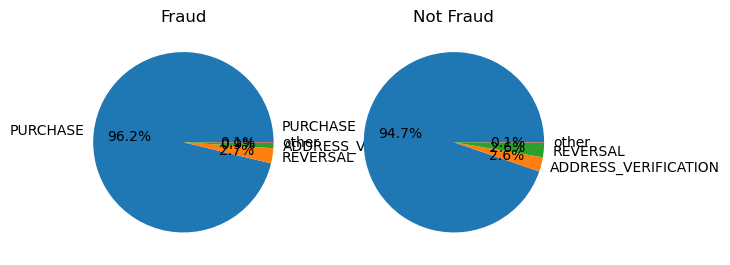

In [68]:
pie(df_merge_Fr,df_merge_NFr,'transactionType')

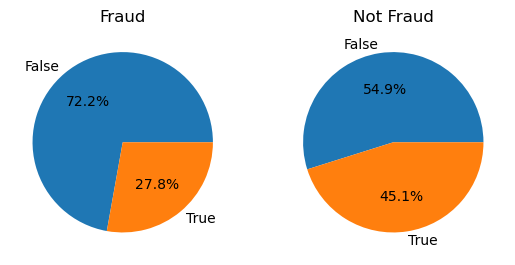

In [69]:
pie(df_merge_Fr,df_merge_NFr,'cardPresent')

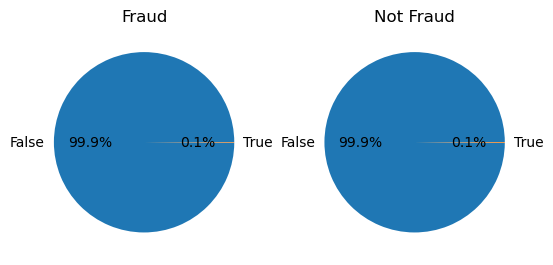

In [70]:
pie(df_merge_Fr,df_merge_NFr,'expirationDateKeyInMatch')

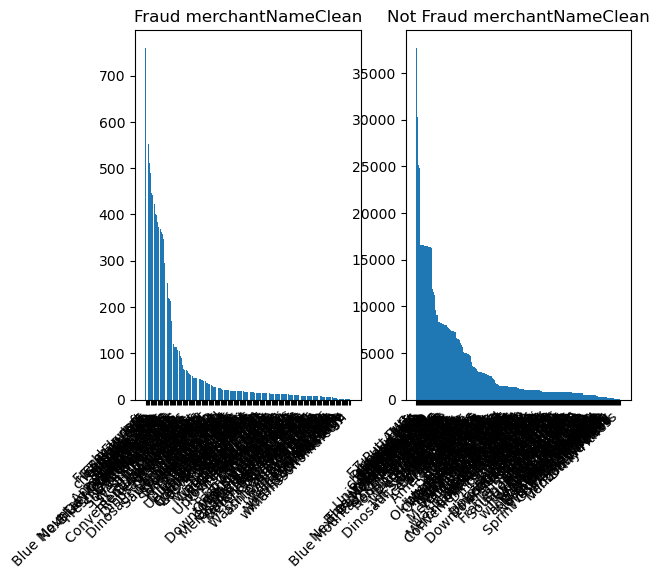

In [71]:
bar(df_merge_Fr,df_merge_NFr,'merchantNameClean')

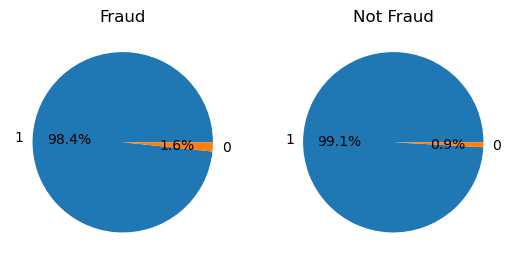

In [72]:
pie(df_merge_Fr,df_merge_NFr,'CVVInMatch')

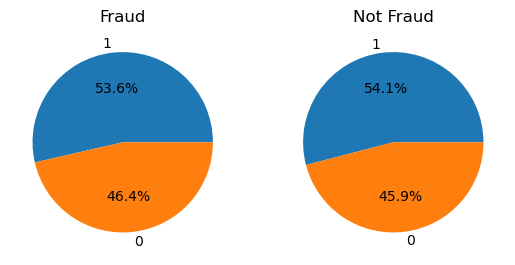

In [73]:
pie(df_merge_Fr,df_merge_NFr,'night')

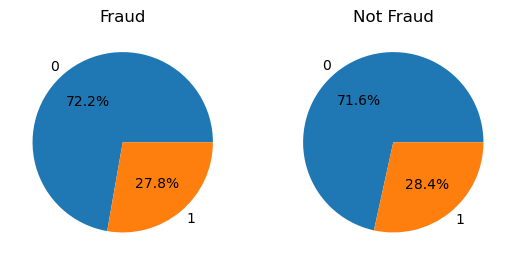

In [74]:
pie(df_merge_Fr,df_merge_NFr,'weekend')

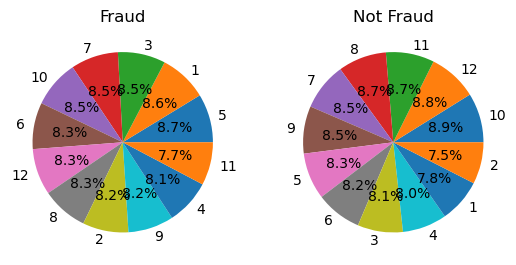

In [75]:
pie(df_merge_Fr,df_merge_NFr,'month')

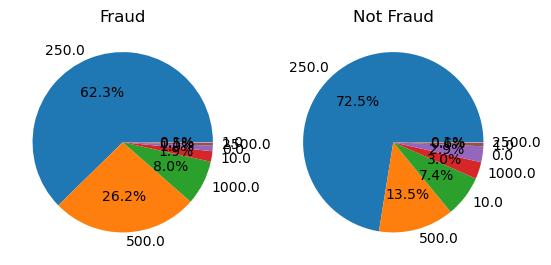

In [76]:
pie(df_merge_Fr,df_merge_NFr,'amount')

In [77]:
Fr=pd.DataFrame(df_merge_Fr.groupby('amount').agg('customerId').count()).sort_values(by='customerId',ascending=False)
Fr.columns=['Fr_count']
NFr=pd.DataFrame(df_merge_NFr.groupby('amount').agg('customerId').count()).sort_values(by='customerId',ascending=False)
NFr.columns=['NFr_count']
print(Fr)
print(NFr)

        Fr_count
amount          
250.0       7740
500.0       3256
1000.0       991
10.0         233
0.0          122
2500.0        59
1.0           16
        NFr_count
amount           
250.0      560737
500.0      104650
10.0        57481
1000.0      23442
0.0         22103
1.0          4639
2500.0        894


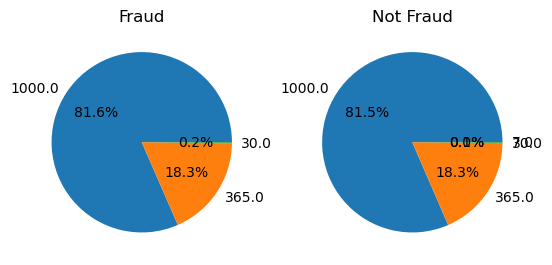

In [78]:
pie(df_merge_Fr,df_merge_NFr,'duration_acc')

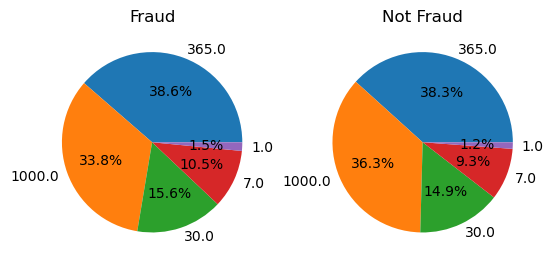

In [79]:
pie(df_merge_Fr,df_merge_NFr,'duration_add')

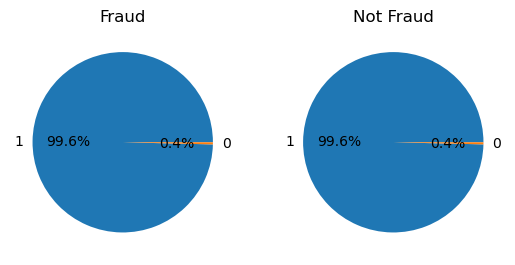

In [80]:
pie(df_merge_Fr,df_merge_NFr,'money')

In [81]:
# dig more infor from merchantCategoryCode, the ratio of Fr customer and NFr customer in the merchantCategoryCode
Fr=pd.DataFrame(df_merge_Fr.groupby('merchantCategoryCode').agg('customerId').count()).sort_values(by='customerId',ascending=False)
Fr.columns=['Fr_count']
NFr=pd.DataFrame(df_merge_NFr.groupby('merchantCategoryCode').agg('customerId').count()).sort_values(by='customerId',ascending=False)
NFr.columns=['NFr_count']
print(Fr)
print(NFr)

                      Fr_count
merchantCategoryCode          
online_retail             4938
online_gifts              1606
rideshare                 1272
fastfood                  1074
food                      1014
entertainment              961
airline                    534
auto                       273
hotels                     250
subscriptions              216
furniture                  103
health                      90
personal care               86
                      NFr_count
merchantCategoryCode           
online_retail            197218
fastfood                 111064
entertainment             79137
food                      74476
online_gifts              64632
rideshare                 49864
hotels                    33847
fuel                      23910
subscriptions             22685
auto                      21378
health                    19002
personal care             18878
mobileapps                14990
airline                   14878
online_subscriptions   

In [82]:
#in some merchantCategory, the fraud is more
temp_mcc=pd.merge(NFr,Fr,on='merchantCategoryCode',how='left')
temp_mcc['mcc_ratio']=temp_mcc['Fr_count']/temp_mcc['NFr_count']
temp_mcc.replace(np.nan,0,inplace=True)
temp_mcc.sort_values(by='mcc_ratio',ascending=False)

,NFr_count,Fr_count,mcc_ratio
merchantCategoryCode,,,
airline,14878,534.0,0.035892
rideshare,49864,1272.0,0.025509
online_retail,197218,4938.0,0.025038
online_gifts,64632,1606.0,0.024848
furniture,7329,103.0,0.014054
food,74476,1014.0,0.013615
auto,21378,273.0,0.012770
entertainment,79137,961.0,0.012143
fastfood,111064,1074.0,0.009670


In [83]:
temp_merge1=pd.merge(df_merge,temp_mcc,on='merchantCategoryCode',how='left')
temp_merge1.drop(['NFr_count','Fr_count'],axis=1,inplace=True)

In [84]:
# dig more infor from merchantNameClean, the ratio of Fr customer and NFr customer in the merchantNameClean
Fr=pd.DataFrame(df_merge_Fr.groupby('merchantNameClean').agg('customerId').count()).sort_values(by='customerId',ascending=False)
Fr.columns=['Fr_count']
NFr=pd.DataFrame(df_merge_NFr.groupby('merchantNameClean').agg('customerId').count()).sort_values(by='customerId',ascending=False)
NFr.columns=['NFr_count']
print(Fr)
print(NFr)

                    Fr_count
merchantNameClean           
Lyft                     760
ebay.com                 639
Fresh Flowers            553
Uber                     512
EZ Putt Putt             490
...                      ...
Northtown Massage          2
West Elm                   2
West End Massage           2
Holiday Inn                2
williamssonoma.com         2

[173 rows x 1 columns]
                   NFr_count
merchantNameClean           
AMC                    37690
EZ Putt Putt           30222
Uber                   25101
Lyft                   24763
oldnavy.com            16591
...                      ...
TMobile Wireless          66
Verizon Wireless          45
ATT                       44
Duane Reed                28
My Fitness                 7

[205 rows x 1 columns]


In [85]:
#in some merchantName, the fraud is more
temp_mnc=pd.merge(NFr,Fr,on='merchantNameClean',how='left')
temp_mnc['mnc_ratio']=temp_mnc['Fr_count']/temp_mnc['NFr_count']
temp_mnc.replace(np.nan,0,inplace=True)
temp_mnc.sort_values(by='mnc_ratio',ascending=False)

,NFr_count,Fr_count,mnc_ratio
merchantNameClean,,,
American Airlines,2844,295.0,0.103727
Fresh Flowers,7781,553.0,0.071071
ethanallen.com,466,24.0,0.051502
Convenient Auto Services,1013,45.0,0.044423
Rove Concepts,452,20.0,0.044248
...,...,...,...
Curves,932,0.0,0.000000
Runners,771,0.0,0.000000
Rock Weights,671,0.0,0.000000


In [86]:
temp_merge2=pd.merge(temp_merge1,temp_mnc,on='merchantNameClean',how='left')
temp_merge2.drop(['NFr_count','Fr_count'],axis=1,inplace=True)

In [87]:
df_merge=temp_merge2

In [88]:
df_in=df_merge.copy()
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customerId                786363 non-null  int64         
 1   creditLimit               786363 non-null  int64         
 2   availableMoney            786363 non-null  float64       
 3   transactionDateTime       786363 non-null  datetime64[ns]
 4   transactionAmount         786363 non-null  float64       
 5   merchantName              786363 non-null  object        
 6   acqCountry                786363 non-null  object        
 7   merchantCountryCode       786363 non-null  object        
 8   posEntryMode              786363 non-null  object        
 9   posConditionCode          786363 non-null  object        
 10  merchantCategoryCode      786363 non-null  object        
 11  currentExpDate            786363 non-null  object        
 12  ac

In [89]:
#drop the features that are not related to the classification
df_in.drop(['customerId','transactionDateTime','transactionAmount','merchantName','merchantCategoryCode','currentExpDate',
            'accountOpenDate','dateOfLastAddressChange','cardCVV','enteredCVV',
            'cardLast4Digits','merchantNameClean'],axis=1,inplace=True)
#drop the features that are not high related to the classification
df_in.drop(['creditLimit','acqCountry','merchantCountryCode','posConditionCode', 'transactionType',
           'expirationDateKeyInMatch','CVVInMatch','night','weekend','month',
            'duration_acc','duration_add','money'],axis=1,inplace=True)

In [90]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786363 entries, 0 to 786362
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   availableMoney  786363 non-null  float64
 1   posEntryMode    786363 non-null  object 
 2   currentBalance  786363 non-null  float64
 3   cardPresent     786363 non-null  bool   
 4   isFraud         786363 non-null  bool   
 5   amount          786363 non-null  float64
 6   fraudRatio      786363 non-null  float64
 7   mcc_ratio       786363 non-null  float64
 8   mnc_ratio       786363 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 49.5+ MB


In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#convert boolean to numerical
le = LabelEncoder()
for i in ['cardPresent','isFraud']:
    df_in[i] = le.fit_transform(df_in[i])

In [92]:
#one-hot coding
df_in = pd.get_dummies(data = df_in,columns = ['posEntryMode'])

### predictive model and model evaulation

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

In [110]:
#split the data into train and test group
train,test = train_test_split(df_in,test_size = .25 ,random_state = 111)

In [111]:
train_copy=train.copy()
test_copy=test.copy()
train_x=train_copy.drop('isFraud',axis=1,inplace=False)
test_x=test_copy.drop('isFraud',axis=1,inplace=False)
train_y=train['isFraud']
test_y=test['isFraud']

In [112]:
inlist=['availableMoney', 'currentBalance', 'cardPresent', 'amount',
       'fraudRatio', 'mcc_ratio', 'mnc_ratio', 'posEntryMode_02',
       'posEntryMode_05', 'posEntryMode_09', 'posEntryMode_80',
       'posEntryMode_90', 'posEntryMode_other']

In [113]:
from imblearn.over_sampling import SMOTE

#oversampling minority class using smote
smote = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = smote.fit_resample(train_x,train_y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=inlist)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=['isFraud'])

In [114]:
from imblearn.over_sampling import RandomOverSampler

#oversampling minority class using random sampling
ROS = RandomOverSampler(random_state = 11) 
os_rs_X, os_rs_Y = ROS.fit_resample(train_x,train_y)
os_rs_X = pd.DataFrame(data = os_rs_X,columns=inlist)
os_rs_Y = pd.DataFrame(data = os_rs_Y,columns=['isFraud'])

In [115]:
from imblearn.under_sampling import RandomUnderSampler

#undersampling majority class using random sampling
RUS = RandomUnderSampler(random_state = 11)
us_rs_X,us_rs_Y = RUS.fit_resample(train_x,train_y)
us_rs_X = pd.DataFrame(data = us_rs_X,columns=inlist)
us_rs_Y = pd.DataFrame(data = us_rs_Y,columns=['isFraud'])

In [117]:
#four datasets: org data, somote data, random oversample, random undersample
data = [[train_x,train_y],
        [os_smote_X, os_smote_Y],
        [os_rs_X, os_rs_Y],
        [us_rs_X, us_rs_Y]]

In [118]:
def evl(model,data):
    for features, labels in data:
        model.fit(features, labels)
        predict_test = model.predict(test_x) 
        cm=confusion_matrix(test_y,predict_test)
        print('auc:%.3f' %roc_auc_score(test_y, predict_test))
        print("AccuracyScore:%.3f" %accuracy_score(test_y,predict_test))
        print("Precision:%.3f" %precision_score(test_y,predict_test,average='weighted'))
        print("False Alarm Rate:%.3f" %(cm[1][0]/(cm[1][0]+cm[1][1])))

In [119]:
#baseline model with four datasets (decision tree)
dt = DecisionTreeClassifier(criterion='gini', random_state=1234)
evl(dt,data)

auc:0.633
AccuracyScore:0.976
Precision:0.989
False Alarm Rate:0.722
auc:0.616
AccuracyScore:0.973
Precision:0.988
False Alarm Rate:0.751
auc:0.619
AccuracyScore:0.978
Precision:0.988
False Alarm Rate:0.752
auc:0.720
AccuracyScore:0.723
Precision:0.994
False Alarm Rate:0.282


In [120]:
#baseline model with four datasets (logistic regression)
logit  = LogisticRegression(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=1234, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
evl(logit,data)

auc:0.760
AccuracyScore:0.780
Precision:0.995
False Alarm Rate:0.261
auc:0.631
AccuracyScore:0.935
Precision:0.989
False Alarm Rate:0.682
auc:0.751
AccuracyScore:0.759
Precision:0.995
False Alarm Rate:0.256
auc:0.747
AccuracyScore:0.755
Precision:0.995
False Alarm Rate:0.261


In [121]:
#random forest with four datasets
RFC=RandomForestClassifier(n_estimators = 100, criterion = 'entropy',class_weight = 'balanced',n_jobs=-1,random_state=1234)
evl(RFC,data)

auc:0.579
AccuracyScore:0.985
Precision:0.987
False Alarm Rate:0.840
auc:0.590
AccuracyScore:0.984
Precision:0.987
False Alarm Rate:0.816
auc:0.603
AccuracyScore:0.984
Precision:0.988
False Alarm Rate:0.789
auc:0.773
AccuracyScore:0.769
Precision:0.995
False Alarm Rate:0.222


In [122]:
def search_model(x_train, y_train, est, param_grid, cv):
    model = GridSearchCV(estimator = est, # the estimator/machine learning model
                                     param_grid = param_grid, # parameter grid
                                     scoring = 'f1', # assign a scoring method 
                                     verbose = 10, # how much text output do we want during the searching process
                                     n_jobs = -1, # the number of process we want to use for the searching job
                                     cv = cv) # number of folds of cross validation
    
    # Fit Grid Search Model
    model.fit(x_train, y_train)   # refit the model to the data
    return model

In [123]:
# this is the parameter choices I would like to try
param_grid = {'n_estimators':[50,100,300],
              'max_depth':[3, 6, 9],
              'max_leaf_nodes':[4, 8, 12, 16, 18]
             }
RF = search_model(us_rs_X, us_rs_Y,RandomForestClassifier(),param_grid,5)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [124]:
# check out the searching results
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.cv_results_) 

Best score: 0.779
Best parameters set: {'max_depth': 9, 'max_leaf_nodes': 18, 'n_estimators': 100}
Scores: {'mean_fit_time': array([0.40739794, 0.80979838, 2.18640132, 0.40020008, 0.7829947 ,
       2.41579804, 0.43219509, 0.84479847, 2.27800069, 0.40559716,
       0.7650003 , 2.27359571, 0.39619865, 0.78580127, 2.26019878,
       0.38539739, 0.76119709, 2.29719915, 0.50059333, 0.92779665,
       2.66699691, 0.50299997, 1.00319705, 3.01319747, 0.57419777,
       1.08239837, 3.07799873, 0.54679899, 1.08680134, 3.18779955,
       0.38000016, 0.82139783, 2.37600083, 0.49339824, 0.98539944,
       2.80179915, 0.56920104, 1.09359918, 3.10940118, 0.59799752,
       1.20160003, 3.86960001, 0.73339839, 1.6405983 , 3.08940072]), 'std_fit_time': array([0.02576012, 0.02587832, 0.01003172, 0.00430893, 0.02158874,
       0.07758803, 0.01404682, 0.03879455, 0.01495267, 0.01256286,
       0.00938057, 0.03360127, 0.00865775, 0.01522653, 0.0267965 ,
       0.0100121 , 0.00724949, 0.07532798, 0.02209104

In [125]:
#final random forest and model evaluation
RFC=RandomForestClassifier(n_estimators = 300, max_depth=9, max_leaf_nodes=18,n_jobs=-1,random_state=1234)
RFC.fit(us_rs_X, us_rs_Y)
predict_test = RFC.predict(test_x) 
probabilities_test = RFC.predict_proba(test_x) 
cm=confusion_matrix(test_y,predict_test)
print('auc:%.3f' %roc_auc_score(test_y, predict_test))
print("AccuracyScore:%.3f" %accuracy_score(test_y,predict_test))
print("Precision:%.3f" %precision_score(test_y,predict_test,average='weighted'))
print("False Alarm Rate:%.3f" %(cm[1][0]/(cm[1][0]+cm[1][1])))

auc:0.771
AccuracyScore:0.733
Precision:0.996
False Alarm Rate:0.191


In [126]:
mydict_rf={}
for i,key in enumerate(df_in.columns[:-1]):
    mydict_rf[key]=mydict_rf.get(key,0)+RFC.feature_importances_[i]
pd_rf=pd.DataFrame.from_dict(mydict_rf, orient='index')
pd_rf.columns=['feature importance']
pd_rf.nlargest(10,columns='feature importance')

,feature importance
amount,0.464567
mcc_ratio,0.195368
fraudRatio,0.108044
posEntryMode_02,0.094648
isFraud,0.073221
posEntryMode_05,0.024367
cardPresent,0.021725
posEntryMode_90,0.006746
mnc_ratio,0.004582
currentBalance,0.004037


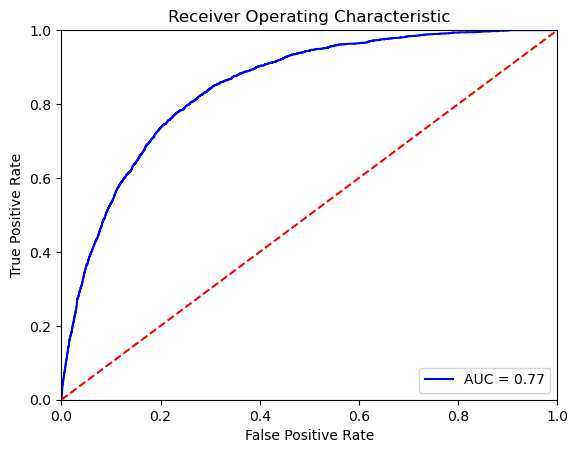

In [127]:
#model evaluation
fpr,tpr,thresholds = roc_curve(test_y,probabilities_test[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(test_y, predict_test))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [128]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df=pca.fit_transform(df_in)

x=pca_df[:,0]
y=pca_df[:,1]

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

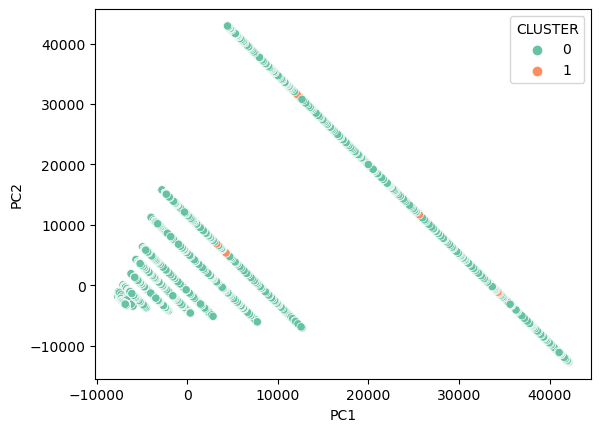

In [129]:
labels=df_in['isFraud']
pc=pd.DataFrame({"PC1":x,"PC2":y,"CLUSTER":labels})
sns.scatterplot(x=pc["PC1"],y=pc["PC2"],hue=pc["CLUSTER"],palette="Set2")